In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
# Model parameters
time_step = 1          # simulation time step in days
start_time = 0         # in days
end_time = 1400        # in days
start_hM = 1000        # starting number of healthy Mosquitoes 
start_iM = 0.0         # starting number of infected Mosquitoes 
start_hV = 499         # starting number of healthy Villagers
start_sV = 1           # starting number of sick Villagers
start_iV = 0.0         # starting number of immune Villagers

# Villager rate parameters
brV = 0.000092         # birth rate of Villagers
drV = 0.00001945       # death rate of Villagers
midrV = 0.00016123     # malaria induced death rate of Villagers
rrV = 1 - midrV        # recovery rate of Villagers
irV = 0.01             # immunity rate of Villagers

# Mosquito rate parameters
#brM = 0.01             # birth rate of Mosquitoes
maxbr = 0.02            #max bite rate
maxdr = 0.002            # max death rate
#drM = 0.011            # death rate of Mosquitoes
brfM = 0.24            # bite rate from Mosquitoes
brM = (np.cos(((time_step * 2 * np.pi)/365) +1) * maxbr) / 2
drM = ((np.cos((time_step * 2 * np.pi)/365 +1)) * maxdr)/2
# Derived constants
N = int((end_time - start_time) / time_step)    # number of simulation steps

# Time-varying quantities, arrays with one value per time step
# The syntax, "[0]*(N+1)," creates a one-dimensional array of length N+1 whose values are all zero.

t = [0]*(N+1)        # time in days

V = [0]*(N+1)        # total Villagers
hV = [0]*(N+1)       # healthy Villagers
sV = [0]*(N+1)       # sick Villagers
iV = [0]*(N+1)       # immune Villagers

M = [0]*(N+1)        # total Mosquitoes 
hM = [0]*(N+1)       # healthy Mosquitoes 
iM = [0]*(N+1)       # infected Mosquitoes

# Initialize and derive variables
t[0] = start_time          
hM[0] = start_hM
iM[0] = start_iM
hV[0] = start_hV
sV[0] = start_sV
iV[0] = start_iV

V[0] = start_hV + start_sV + start_iV
M[0] = start_hM + start_iM

In [3]:
def Healthy_Villagers ( i, hV, sV, brV, drV, rrV, M, iM, brfM ) :
    hV[i+1] = hV[i] + (hV[i] * brV) - (hV[i] * drV) + (sV[i] * rrV) - (hV[i] * brfM * (iM[i] / max(M[i],1)))

def Sick_Villagers ( i, hV, sV, rrV, irV, drV, M, iM, brfM, midrV ) :
    sV[i+1] = sV[i] - (drV + midrV)*sV[i] - (sV[i] * rrV) - sV[i]*irV + brfM*hV[i]*(iM[i]/M[i])


def  Immune_Villagers ( iV, sV, irV, drV ) :
    iV[i+1] = iV[i] + sV[i]*irV - iV[i]*drV



def Healthy_Mosquitoes ( V, sV, M, hM, brM, drM, brfM ) :	
    hM[i+1] = hM[i] - hM[i]*drM + M[i]*brM - hM[i]*(sV[i]/(V[i]+1))*brfM


def Infected_Mosquitoes ( V, sV, hM, iM, drM, brfM ) :
    iM[i+1] = iM[i] - drM*iM[i] + hM[i]*(sV[i]/(V[i]+1))*brfM

In [4]:
for i in range(N):
    t[i+1] = t[i] + time_step
    
    Healthy_Villagers ( i, hV, sV, brV, drV, rrV, M, iM, brfM )
    
    Sick_Villagers ( i, hV, sV, rrV, irV, drV, M, iM, brfM, midrV )
    
    Immune_Villagers ( iV, sV, irV, drV )
    
    Healthy_Mosquitoes ( V, sV, M, hM, brM, drM, brfM )
    
    Infected_Mosquitoes ( V, sV, hM, iM, drM, brfM )
    
    # Update current total humans
    V[i+1] = hV[i]+ sV[i] + iV[i]    
    
    # Update current total mosquitoes    
    M[i+1] = hM[i] + iM[i]

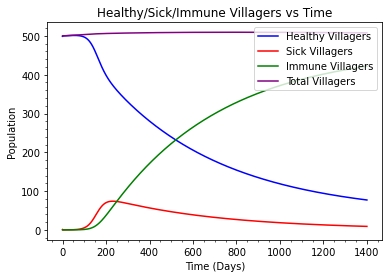

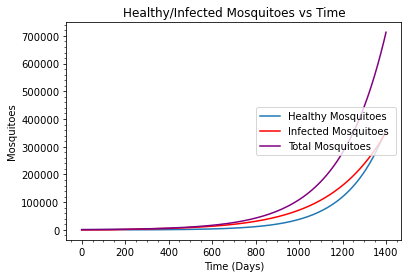

In [5]:
# Now plot the results on two separate graphs  
plt.figure()  
plt.title('Healthy/Sick/Immune Villagers vs Time')
plt.ylabel('Population')
plt.xlabel('Time (Days)')

plt.plot(t,hV, color = "blue", label = "Healthy Villagers" )
plt.plot(t,sV, color="red", label = "Sick Villagers")
plt.plot(t,iV, color="green", label = "Immune Villagers")
plt.plot(t,V, color="purple", label = "Total Villagers")

plt.legend(loc='upper right')

plt.minorticks_on()

plt.show()

#plot 2
plt.figure()
plt.title('Healthy/Infected Mosquitoes vs Time')
plt.ylabel('Mosquitoes')
plt.xlabel('Time (Days)')

plt.plot(t, hM, label = "Healthy Mosquitoes" )
plt.plot(t, iM, color="red", label = "Infected Mosquitoes ")
plt.plot(t, M, color="purple", label = "Total Mosquitoes")

plt.legend(loc='center right')

plt.minorticks_on()

plt.show()